In [1]:
import numpy as np

In [41]:
class FuzzySet:
    def __init__(self, name, values):
        self.name = name
        self.values = values  # values should be a dictionary {element: degree}

    def __repr__(self):
        return f"{self.name}: {self.values}"

## Fuzzy sets visualization

In [42]:
import numpy as np

class FuzzySystem:
    def __init__(self):
        self.fuzzy_sets = []
    
    def add_fuzzy_set(self, fuzzy_set):
        self.fuzzy_sets.append(fuzzy_set)

    def build_relation_matrix(self):
        n = len(self.fuzzy_sets)
        # Инициализируем матрицу
        matrix = np.zeros((n, n))
        
        for i in range(n):
            for j in range(n):
                if i != j:  # Исключаем самосовпадение
                    intersection = self.intersection(self.fuzzy_sets[i], self.fuzzy_sets[j])
                    matrix[i][j] = intersection
        
        return matrix

    def intersection(self, set_a, set_b):
        intersection_value = 0
        for element in set_a.values.keys():
            if element in set_b.values:
                intersection_value = max(intersection_value, min(set_a.values[element], set_b.values[element]))
        return intersection_value

In [43]:
import matplotlib.pyplot as plt

def plot_relation_matrix(matrix):
    plt.imshow(matrix, interpolation='nearest', cmap='gray')
    plt.colorbar()
    plt.title("Продукционная матрица нечётких множеств")
    plt.show()

def fold_matrix(matrix):
    folded_matrix = np.maximum(matrix, matrix.T)  # Применяем максимальное объединение
    return folded_matrix

def transpose_matrix(matrix):
    return np.transpose(matrix)

def complement_fuzzy_set(fuzzy_set):
    complement_values = {element: 1 - degree for element, degree in fuzzy_set.values.items()}
    return FuzzySet(f"{fuzzy_set.name} (Complement)", complement_values)

def modus_ponens(p, implication):
    if p in p.values and p[implication]:
        return True
    return False

def modus_tollens(implication, negation_q):
    if implication in negation_q:
        return True
    return False

Матрица нечётких множеств:
[[0.  0.7 0.5]
 [0.7 0.  0.4]
 [0.5 0.4 0. ]]


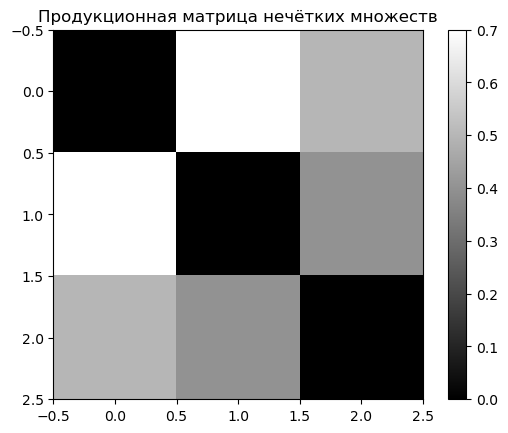

Свёрнутая матрица:
[[0.  0.7 0.5]
 [0.7 0.  0.4]
 [0.5 0.4 0. ]]


In [44]:
fuzzy_set_1 = FuzzySet('Set 1', {'A': 0.9, 'B': 0.8})
fuzzy_set_2 = FuzzySet('Set 2', {'B': 0.7, 'C': 0.6})
fuzzy_set_3 = FuzzySet('Set 3', {'A': 0.5, 'C': 0.4})

# System creation
system = FuzzySystem()
system.add_fuzzy_set(fuzzy_set_1)
system.add_fuzzy_set(fuzzy_set_2)
system.add_fuzzy_set(fuzzy_set_3)

# Build matrix
relation_matrix = system.build_relation_matrix()
print("Матрица нечётких множеств:")
print(relation_matrix)

# Plot matrix
plot_relation_matrix(relation_matrix)

# Fold matrix
folded_matrix = fold_matrix(relation_matrix)
print("Свёрнутая матрица:")
print(folded_matrix)

